In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kurtosis

sns.set_theme()
sns.set_context("talk")


In [2]:
master_df = pd.read_csv('master_df_2.csv')

master_df.IMAGE_SERIES.unique()

array(['PRF5_B3_pickup', 'PRF5_A3', 'PRF5_C3', 'PRF5_D3', 'JHH4_B2',
       'JHH4_A2', 'JHH6_A1', 'JHH6_B1', 'JHH6_D1', 'JHH6_C1_pickup',
       'JHH7_C5', 'JHH7_D5', 'JHH7_A5', 'JHH7_B5_pickup', 'JHH7_2.5uM_n2',
       'JHH7_2.5uM_n3', 'JHH7_2.5uM_n4', 'JHH7_2.5uM_n1', 'JHH6_2.5uM_n2',
       'JHH6_2.5uM_n3', 'JHH6_2.5uM_n4', 'JHH6_2.5uM_n1', 'JHH7_0uM_n1',
       'JHH7_0uM_n4', 'JHH7_0uM_n3', 'JHH7_0uM_n2', 'JHH6_0uM_n2',
       'JHH6_0uM_n3', 'JHH6_0uM_n4', 'JHH6_0uM_n1', 'JHH7_1uM_n1',
       'JHH7_1uM_n2', 'JHH7_1uM_n3', 'JHH7_1uM_n4', 'JHH6_1uM_n4',
       'JHH6_1uM_n3', 'JHH6_1uM_n2', 'JHH6_1uM_n1', 'Huh7_B4_Pickup',
       'Huh7_A4', 'Huh7_C4', 'Huh7_D4', 'Kami41_A6', 'Kami41_C6',
       'Kami41_D6', 'Kami41_B6_pickup', 'JHH4 D2', 'JHH4 C2 Pickup'],
      dtype=object)

In [3]:
treatment_cell_lines = ['JHH6_0uM_n1', 'JHH6_0uM_n2', 'JHH6_0uM_n3', 'JHH6_0uM_n4',
                        'JHH6_1uM_n1', 'JHH6_1uM_n2', 'JHH6_1uM_n3', 'JHH6_1uM_n4',
                        'JHH6_2.5uM_n1','JHH6_2.5uM_n2','JHH6_2.5uM_n3', 'JHH6_2.5uM_n4',
                        'JHH7_0uM_n1', 'JHH7_0uM_n2', 'JHH7_0uM_n3', 'JHH7_0uM_n4',
                        'JHH7_1uM_n1', 'JHH7_1uM_n2', 'JHH7_1uM_n3', 'JHH7_1uM_n4',
                        'JHH7_2.5uM_n1','JHH7_2.5uM_n2','JHH7_2.5uM_n3', 'JHH7_2.5uM_n4']

treated_df = master_df[master_df.IMAGE_SERIES.isin(treatment_cell_lines)]
treated_df


,IMAGE_SERIES,Label,TRACK_ID,NUMBER_SPOTS,NUMBER_GAPS,LONGEST_GAP,NUMBER_SPLITS,NUMBER_MERGES,NUMBER_COMPLEX,TRACK_DURATION,...,TRACK_MEAN_SPEED,TRACK_MAX_SPEED,TRACK_MIN_SPEED,TRACK_MEDIAN_SPEED,TRACK_STD_SPEED,TRACK_MEAN_QUALITY,TRACK_MAX_QUALITY,TRACK_MIN_QUALITY,TRACK_MEDIAN_QUALITY,TRACK_STD_QUALITY
12413,JHH7_2.5uM_n2,Track_0,0,8,0,0,0,0,0,7,...,6.608,28.860,0.017,1.840,10.380,0.119,0.135,0.102,0.119,0.012
12414,JHH7_2.5uM_n2,Track_1,1,97,0,0,0,0,0,96,...,0.926,29.485,0.036,0.287,3.118,0.120,0.126,0.117,0.120,0.002
12415,JHH7_2.5uM_n2,Track_2,2,97,0,0,0,0,0,96,...,4.237,28.719,0.473,3.226,4.092,0.130,0.143,0.110,0.130,0.008
12416,JHH7_2.5uM_n2,Track_3,3,53,1,1,0,0,0,53,...,1.107,29.500,0.004,0.257,4.198,0.107,0.110,0.100,0.108,0.002
12417,JHH7_2.5uM_n2,Track_4,4,96,1,1,0,0,0,96,...,1.379,25.519,0.045,0.818,2.765,0.125,0.139,0.101,0.136,0.013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21723,JHH6_1uM_n1,Track_303,303,3,0,0,0,0,0,2,...,6.000,9.000,3.000,9.000,4.243,0.107,0.118,0.102,0.102,0.008
21724,JHH6_1uM_n1,Track_304,304,2,0,0,0,0,0,1,...,3.000,3.000,3.000,3.000,NaN,0.125,0.139,0.111,0.139,0.014
21725,JHH6_1uM_n1,Track_305,305,3,0,0,0,0,0,2,...,14.577,20.359,8.796,20.359,8.176,0.132,0.141,0.118,0.137,0.010
21726,JHH6_1uM_n1,Track_306,306,2,0,0,0,0,0,1,...,4.088,4.088,4.088,4.088,NaN,0.104,0.107,0.101,0.107,0.003


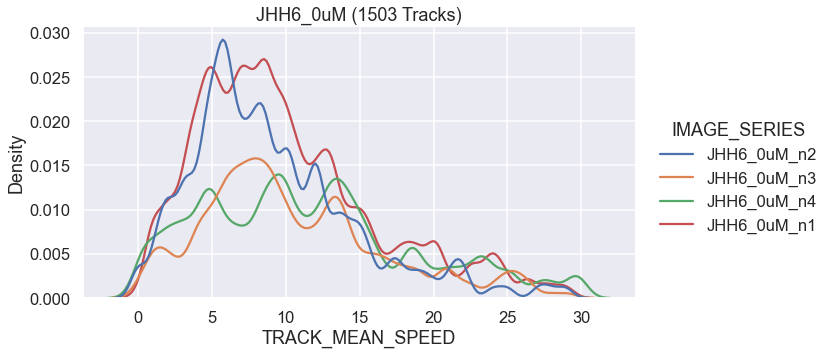

In [4]:
JHH6_0uM_lines = ['JHH6_0uM_n1', 'JHH6_0uM_n2', 'JHH6_0uM_n3', 'JHH6_0uM_n4']

JHH6_0uM = master_df[master_df.IMAGE_SERIES.isin(JHH6_0uM_lines)]
JHH6_0uM = JHH6_0uM.reset_index()
count = len(JHH6_0uM)

JHH6_0uM_TRACK_MEAN_SPEED_df = JHH6_0uM[['TRACK_MEAN_SPEED', 'IMAGE_SERIES']]

sns.displot(JHH6_0uM_TRACK_MEAN_SPEED_df, x='TRACK_MEAN_SPEED', hue='IMAGE_SERIES', 
            kind="kde", bw_adjust=.3, height=5, aspect=15/8).set(title='JHH6_0uM ({} Tracks)'.format(count))


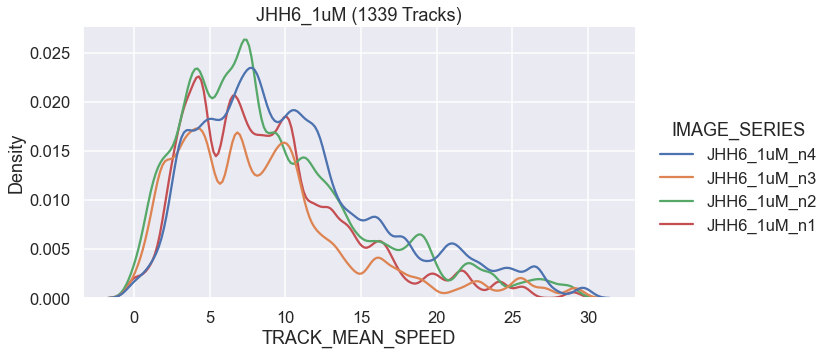

In [5]:
JHH6_1uM_lines = ['JHH6_1uM_n1', 'JHH6_1uM_n2', 'JHH6_1uM_n3', 'JHH6_1uM_n4']

JHH6_1uM = master_df[master_df.IMAGE_SERIES.isin(JHH6_1uM_lines)]
JHH6_1uM = JHH6_1uM.reset_index()
count = len(JHH6_1uM)

JHH6_1uM_TRACK_MEAN_SPEED_df = JHH6_1uM[['TRACK_MEAN_SPEED', 'IMAGE_SERIES']]

sns.displot(JHH6_1uM_TRACK_MEAN_SPEED_df, x='TRACK_MEAN_SPEED', hue='IMAGE_SERIES', 
            kind="kde", bw_adjust=.3, height=5, aspect=15/8).set(title='JHH6_1uM ({} Tracks)'.format(count))



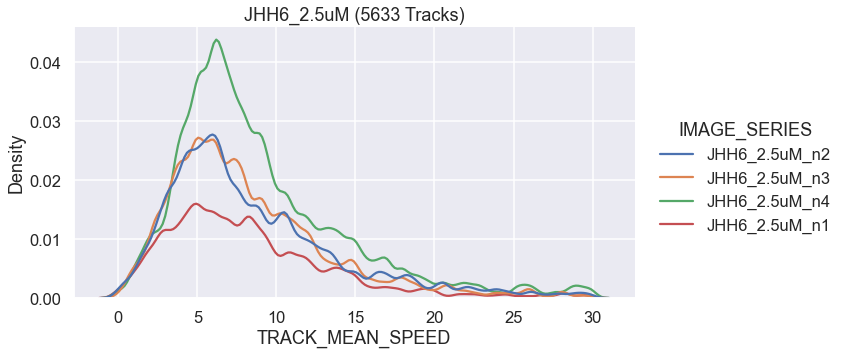

In [6]:
JHH6_2uM_lines = ['JHH6_2.5uM_n1','JHH6_2.5uM_n2','JHH6_2.5uM_n3', 'JHH6_2.5uM_n4']

JHH6_2uM = master_df[master_df.IMAGE_SERIES.isin(JHH6_2uM_lines)]
JHH6_2uM = JHH6_2uM.reset_index()
count = len(JHH6_2uM)

JHH6_2uM_TRACK_MEAN_SPEED_df = JHH6_2uM[['TRACK_MEAN_SPEED', 'IMAGE_SERIES']]

sns.displot(JHH6_2uM_TRACK_MEAN_SPEED_df, x='TRACK_MEAN_SPEED', hue='IMAGE_SERIES', 
            kind="kde", bw_adjust=.3, height=5, aspect=15/8).set(title='JHH6_2.5uM ({} Tracks)'.format(count))


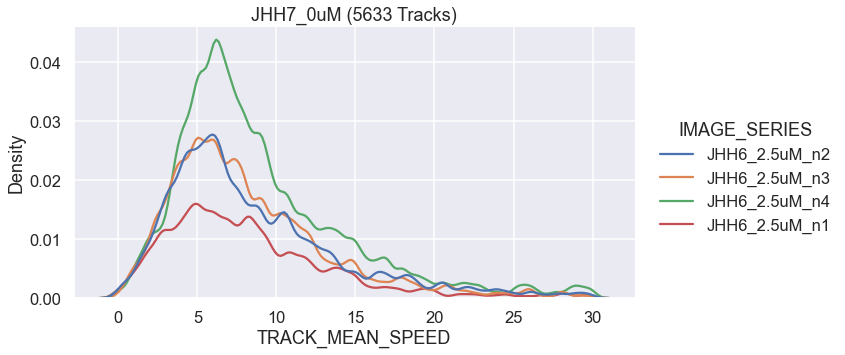

In [7]:
JHH7_0uM_lines = ['JHH7_0uM_n1', 'JHH7_0uM_n2', 'JHH7_0uM_n3', 'JHH7_0uM_n4']

JHH7_0uM = master_df[master_df.IMAGE_SERIES.isin(JHH7_0uM_lines)]
JHH7_0uM = JHH6_2uM.reset_index()
count = len(JHH7_0uM)

JHH7_0uM_TRACK_MEAN_SPEED_df = JHH7_0uM[['TRACK_MEAN_SPEED', 'IMAGE_SERIES']]

sns.displot(JHH7_0uM_TRACK_MEAN_SPEED_df, x='TRACK_MEAN_SPEED', hue='IMAGE_SERIES', 
            kind="kde", bw_adjust=.3, height=5, aspect=15/8).set(title='JHH7_0uM ({} Tracks)'.format(count))



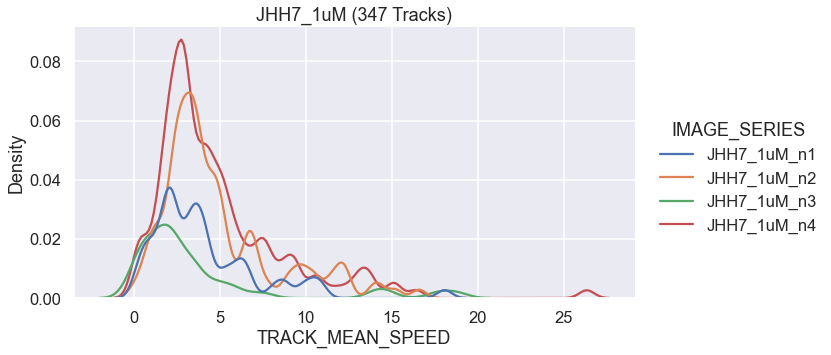

In [8]:
JHH7_1uM_lines = ['JHH7_1uM_n1', 'JHH7_1uM_n2', 'JHH7_1uM_n3', 'JHH7_1uM_n4']

JHH7_1uM = master_df[master_df.IMAGE_SERIES.isin(JHH7_1uM_lines)]
JHH7_1uM = JHH7_1uM.reset_index()
count = len(JHH7_1uM)

JHH7_1uM_TRACK_MEAN_SPEED_df = JHH7_1uM[['TRACK_MEAN_SPEED', 'IMAGE_SERIES']]

sns.displot(JHH7_1uM_TRACK_MEAN_SPEED_df, x='TRACK_MEAN_SPEED', hue='IMAGE_SERIES', 
            kind="kde", bw_adjust=.3, height=5, aspect=15/8).set(title='JHH7_1uM ({} Tracks)'.format(count))


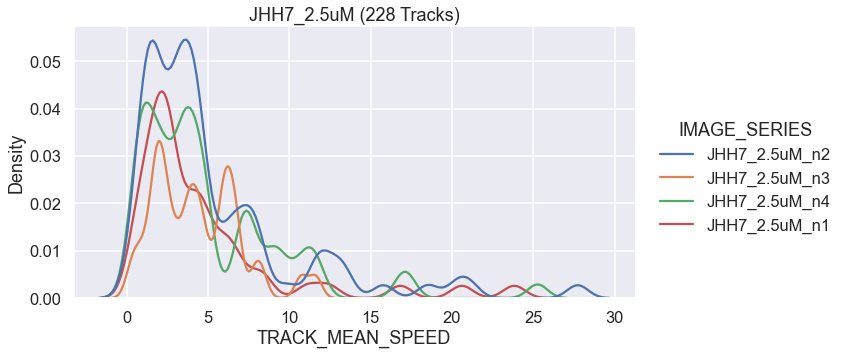

In [9]:
JHH7_2uM_lines = ['JHH7_2.5uM_n1','JHH7_2.5uM_n2','JHH7_2.5uM_n3', 'JHH7_2.5uM_n4']

JHH7_2uM = master_df[master_df.IMAGE_SERIES.isin(JHH7_2uM_lines)]
JHH7_2uM = JHH7_2uM.reset_index()
count = len(JHH7_2uM)

JHH7_2uM_TRACK_MEAN_SPEED_df = JHH7_2uM[['TRACK_MEAN_SPEED', 'IMAGE_SERIES']]

sns.displot(JHH7_2uM_TRACK_MEAN_SPEED_df, x='TRACK_MEAN_SPEED', hue='IMAGE_SERIES', 
            kind="kde", bw_adjust=.3, height=5, aspect=15/8).set(title='JHH7_2.5uM ({} Tracks)'.format(count))


In [10]:
# add treatment condition column
JHH6_0uM['cell_line'] = 'JHH6_0uM'
JHH6_1uM['cell_line'] = 'JHH6_1uM'
JHH6_2uM['cell_line'] = 'JHH6_2.5uM'
JHH7_0uM['cell_line'] = 'JHH7_0uM'
JHH7_1uM['cell_line'] = 'JHH7_1uM'
JHH7_2uM['cell_line'] = 'JHH7_2.5uM'

In [11]:
full_treated_df = pd.concat([JHH6_0uM, JHH6_1uM, JHH6_2uM, JHH7_0uM, JHH7_1uM, JHH7_2uM])
full_treated_df = full_treated_df.reset_index(drop=True)
# full_treated_df

kurtosis:  4.482522056427883


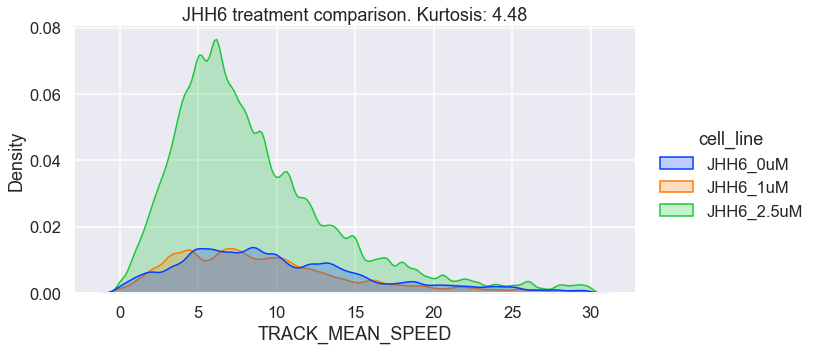

In [28]:
# JHH6 Treatment Comparison

JHH6 = full_treated_df[(full_treated_df['cell_line'] == 'JHH6_0uM') | 
                       (full_treated_df['cell_line'] == 'JHH6_1uM') |
                      (full_treated_df['cell_line'] == 'JHH6_2.5uM')]

JHH6_TRACK_MEAN_SPEED = JHH6[['TRACK_MEAN_SPEED', 'cell_line']]
kurtosis_ = round(kurtosis(JHH6_TRACK_MEAN_SPEED['TRACK_MEAN_SPEED'], fisher=False), 2)
print('kurtosis: ', kurtosis(JHH6_TRACK_MEAN_SPEED['TRACK_MEAN_SPEED'], fisher=False))

sns.displot(JHH6_TRACK_MEAN_SPEED, x='TRACK_MEAN_SPEED', hue='cell_line', kind="kde", bw_adjust=.3, fill=True,
            palette=sns.color_palette('bright')[:3], height=5, aspect=15/8).set(title='JHH6 treatment comparison. Kurtosis: {}'.format(kurtosis_))


kurtosis:  3.39


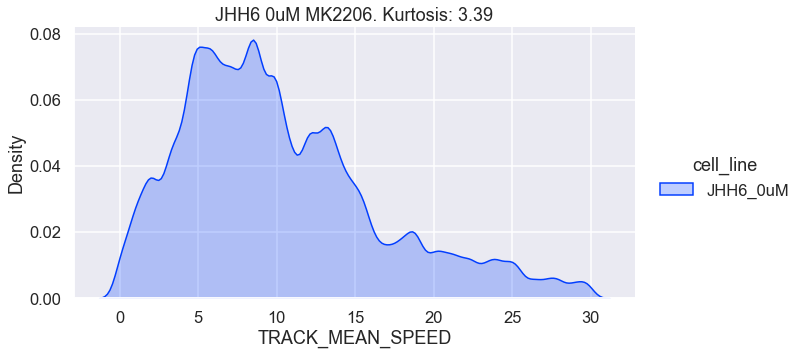

In [24]:
# JHH6 0uM Treatment

JHH6 = full_treated_df[(full_treated_df['cell_line'] == 'JHH6_0uM')]

JHH6_TRACK_MEAN_SPEED = JHH6[['TRACK_MEAN_SPEED', 'cell_line']]
kurtosis_ = round(kurtosis(JHH6_TRACK_MEAN_SPEED['TRACK_MEAN_SPEED'], fisher=False), 2)
print('kurtosis: ', kurtosis_)

sns.displot(JHH6_TRACK_MEAN_SPEED, x='TRACK_MEAN_SPEED', hue='cell_line', kind="kde", bw_adjust=.3, fill=True,
            palette=sns.color_palette('bright')[:1], height=5, aspect=15/8).set(title='JHH6 0uM MK2206. Kurtosis: {}'.format(kurtosis_))


kurtosis:  3.8


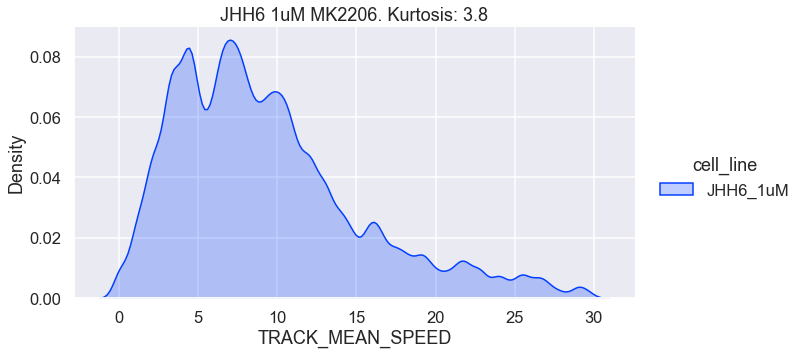

In [25]:
# JHH6 1uM Treatment

JHH6 = full_treated_df[(full_treated_df['cell_line'] == 'JHH6_1uM')]

JHH6_TRACK_MEAN_SPEED = JHH6[['TRACK_MEAN_SPEED', 'cell_line']]
kurtosis_ = round(kurtosis(JHH6_TRACK_MEAN_SPEED['TRACK_MEAN_SPEED'], fisher=False), 2)
print('kurtosis: ', kurtosis_)

sns.displot(JHH6_TRACK_MEAN_SPEED, x='TRACK_MEAN_SPEED', hue='cell_line', kind="kde", bw_adjust=.3, fill=True,
            palette=sns.color_palette('bright')[:1], height=5, aspect=15/8).set(title='JHH6 1uM MK2206. Kurtosis: {}'.format(kurtosis_))



kurtosis:  5.16


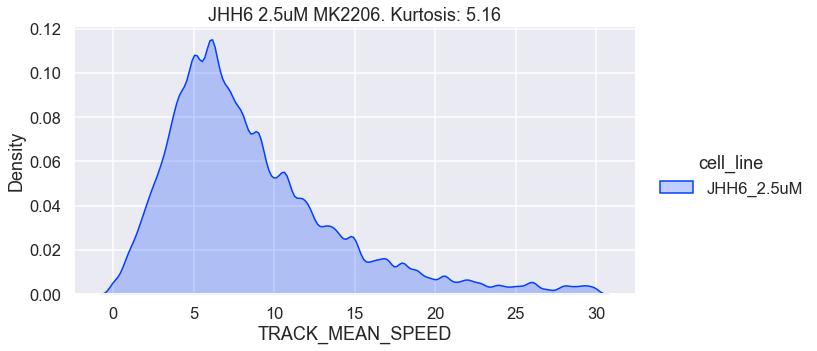

In [26]:
# JHH6 0uM Treatment

JHH6 = full_treated_df[(full_treated_df['cell_line'] == 'JHH6_2.5uM')]

JHH6_TRACK_MEAN_SPEED = JHH6[['TRACK_MEAN_SPEED', 'cell_line']]
kurtosis_ = round(kurtosis(JHH6_TRACK_MEAN_SPEED['TRACK_MEAN_SPEED'], fisher=False), 2)
print('kurtosis: ', kurtosis_)

sns.displot(JHH6_TRACK_MEAN_SPEED, x='TRACK_MEAN_SPEED', hue='cell_line', kind="kde", bw_adjust=.3, fill=True,
            palette=sns.color_palette('bright')[:1], height=5, aspect=15/8).set(title='JHH6 2.5uM MK2206. Kurtosis: {}'.format(kurtosis_))



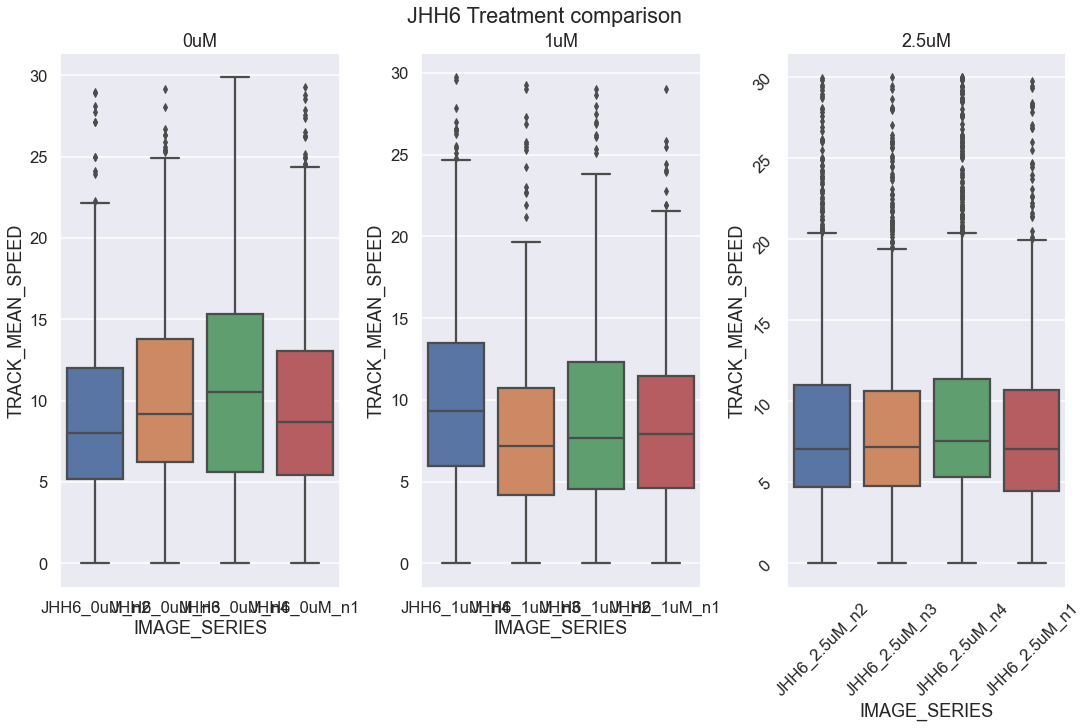

In [16]:
# JHH6 Treatment comparison subplots

fig, axes = plt.subplots(1, 3, figsize=(15, 10), constrained_layout=True)
plt.tick_params(labelrotation=45)
fig.suptitle('JHH6 Treatment comparison')

# 0uM
sns.boxplot(ax=axes[0], x=JHH6_0uM_TRACK_MEAN_SPEED_df['IMAGE_SERIES'], y=JHH6_0uM_TRACK_MEAN_SPEED_df['TRACK_MEAN_SPEED'])
axes[0].set_title('0uM')
plt.tick_params(labelrotation=45)

# 1uM
sns.boxplot(ax=axes[1], x=JHH6_1uM_TRACK_MEAN_SPEED_df['IMAGE_SERIES'], y=JHH6_1uM_TRACK_MEAN_SPEED_df['TRACK_MEAN_SPEED'])
axes[1].set_title('1uM')
plt.tick_params(labelrotation=45)

# 2.5uM
sns.boxplot(ax=axes[2], x=JHH6_2uM_TRACK_MEAN_SPEED_df['IMAGE_SERIES'], y=JHH6_2uM_TRACK_MEAN_SPEED_df['TRACK_MEAN_SPEED'])
axes[2].set_title('2.5uM')
plt.tick_params(labelrotation=45)


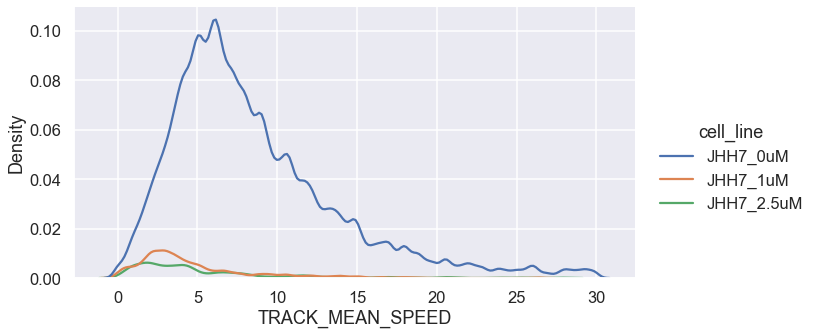

In [17]:
# JHH7 Treatment Comparison

JHH7 = full_treated_df[(full_treated_df['cell_line'] == 'JHH7_0uM') | 
                       (full_treated_df['cell_line'] == 'JHH7_1uM') |
                      (full_treated_df['cell_line'] == 'JHH7_2.5uM')]

JHH7_TRACK_MEAN_SPEED = JHH7[['TRACK_MEAN_SPEED', 'cell_line']]

sns.displot(JHH7_TRACK_MEAN_SPEED, x='TRACK_MEAN_SPEED', hue='cell_line', kind="kde", bw_adjust=.3, height=5, aspect=15/8)



kurtosis:  5.16


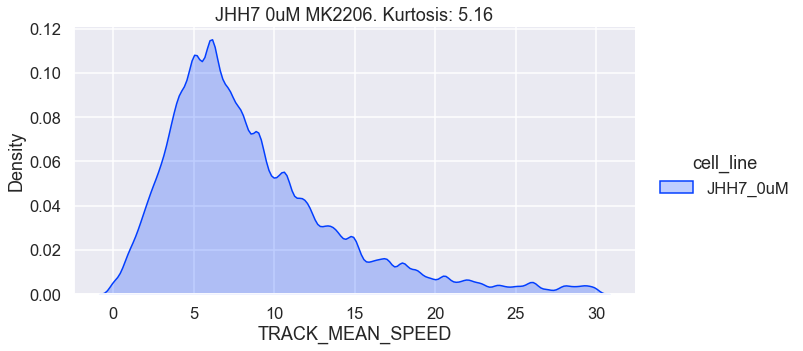

In [37]:
# JHH7 0uM Treatment

JHH7 = full_treated_df[(full_treated_df['cell_line'] == 'JHH7_0uM')]

JHH7_TRACK_MEAN_SPEED = JHH7[['TRACK_MEAN_SPEED', 'cell_line']]
kurtosis_ = round(kurtosis(JHH7_TRACK_MEAN_SPEED['TRACK_MEAN_SPEED'], fisher=False), 2)
print('kurtosis: ', kurtosis_)

sns.displot(JHH7_TRACK_MEAN_SPEED, x='TRACK_MEAN_SPEED', hue='cell_line', kind="kde", bw_adjust=.3, fill=True,
            palette=sns.color_palette('bright')[:1], height=5, aspect=15/8).set(title='JHH7 0uM MK2206. Kurtosis: {}'.format(kurtosis_))



kurtosis:  7.37


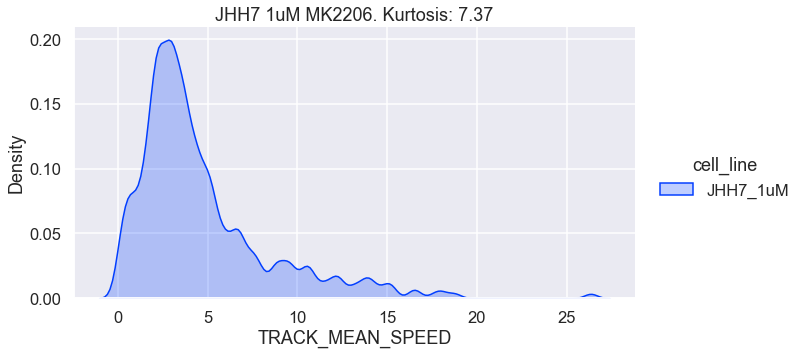

In [38]:
# JHH7 1uM Treatment

JHH7 = full_treated_df[(full_treated_df['cell_line'] == 'JHH7_1uM')]

JHH7_TRACK_MEAN_SPEED = JHH7[['TRACK_MEAN_SPEED', 'cell_line']]
kurtosis_ = round(kurtosis(JHH7_TRACK_MEAN_SPEED['TRACK_MEAN_SPEED'], fisher=False), 2)
print('kurtosis: ', kurtosis_)

sns.displot(JHH7_TRACK_MEAN_SPEED, x='TRACK_MEAN_SPEED', hue='cell_line', kind="kde", bw_adjust=.3, fill=True,
            palette=sns.color_palette('bright')[:1], height=5, aspect=15/8).set(title='JHH7 1uM MK2206. Kurtosis: {}'.format(kurtosis_))




kurtosis:  8.73


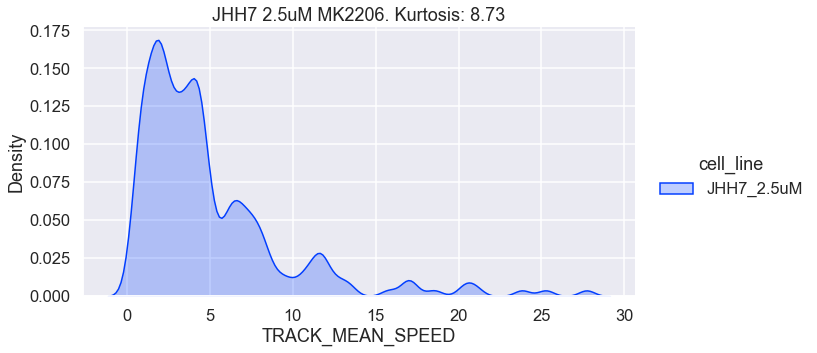

In [39]:
# JHH7 2.5uM Treatment

JHH7 = full_treated_df[(full_treated_df['cell_line'] == 'JHH7_2.5uM')]

JHH7_TRACK_MEAN_SPEED = JHH7[['TRACK_MEAN_SPEED', 'cell_line']]
kurtosis_ = round(kurtosis(JHH7_TRACK_MEAN_SPEED['TRACK_MEAN_SPEED'], fisher=False), 2)
print('kurtosis: ', kurtosis_)

sns.displot(JHH7_TRACK_MEAN_SPEED, x='TRACK_MEAN_SPEED', hue='cell_line', kind="kde", bw_adjust=.3, fill=True,
            palette=sns.color_palette('bright')[:1], height=5, aspect=15/8).set(title='JHH7 2.5uM MK2206. Kurtosis: {}'.format(kurtosis_))


kurtosis:  5.18


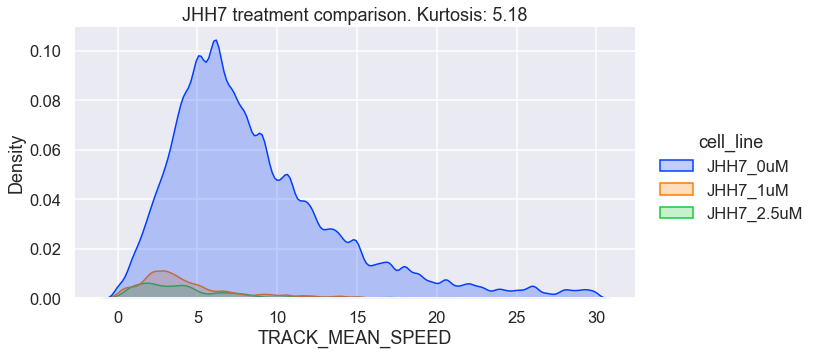

In [42]:
# JHH7 Treatment Comparison

JHH7 = full_treated_df[(full_treated_df['cell_line'] == 'JHH7_0uM') | 
                       (full_treated_df['cell_line'] == 'JHH7_1uM') |
                      (full_treated_df['cell_line'] == 'JHH7_2.5uM')]

JHH7_TRACK_MEAN_SPEED = JHH7[['TRACK_MEAN_SPEED', 'cell_line']]
kurtosis_ = round(kurtosis(JHH7_TRACK_MEAN_SPEED['TRACK_MEAN_SPEED'], fisher=False), 2)
print('kurtosis: ', kurtosis_)

sns.displot(JHH7_TRACK_MEAN_SPEED, x='TRACK_MEAN_SPEED', hue='cell_line', kind="kde", bw_adjust=.3, fill=True,
            palette=sns.color_palette('bright')[:3], height=5, aspect=15/8).set(title='JHH7 treatment comparison. Kurtosis: {}'.format(kurtosis_))



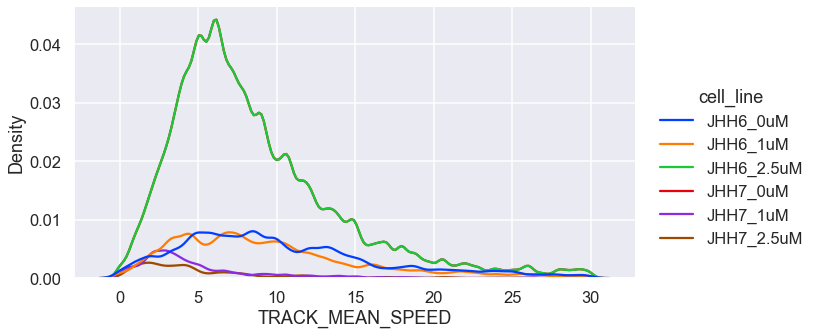

In [49]:
# JHH6 / JHH7 Treatment Comparison

JHH6_JHH7_df = pd.concat([JHH6_TRACK_MEAN_SPEED, JHH7_TRACK_MEAN_SPEED])
JHH6_JHH7_df = JHH6_JHH7_df.reset_index(drop=True)
colors = len(JHH6_JHH7_df.cell_line.unique())

sns.displot(JHH6_JHH7_df, x='TRACK_MEAN_SPEED', hue='cell_line', kind="kde", bw_adjust=.3, 
            palette=sns.color_palette('bright')[:colors], height=5, aspect=15/8)


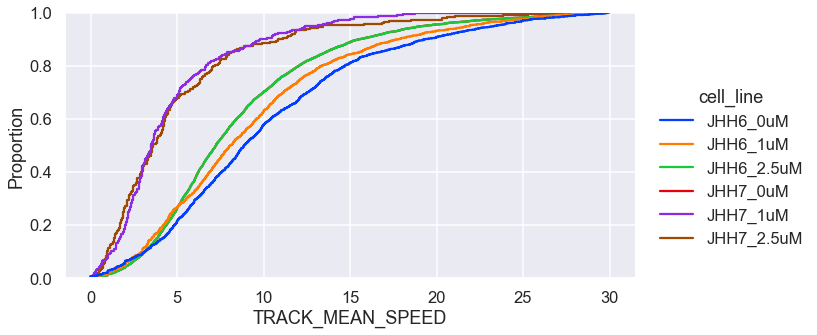

In [50]:
# JHH6 / JHH7 Treatment Comparison

JHH6_JHH7_df = pd.concat([JHH6_TRACK_MEAN_SPEED, JHH7_TRACK_MEAN_SPEED])
JHH6_JHH7_df = JHH6_JHH7_df.reset_index(drop=True)
colors = len(JHH6_JHH7_df.cell_line.unique())

sns.displot(JHH6_JHH7_df, x='TRACK_MEAN_SPEED', hue='cell_line', kind="ecdf", 
            palette=sns.color_palette('bright')[:colors], height=5, aspect=15/8)



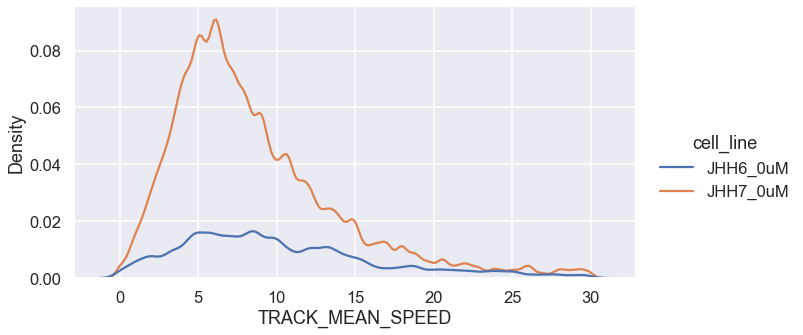

In [19]:
# JHH6_0uM / JHH7_0uM Treatment Comparison

JHH6_0_JHH7_0_df = full_treated_df[(full_treated_df['cell_line'] == 'JHH6_0uM') | 
                                   (full_treated_df['cell_line'] == 'JHH7_0uM')]

JHH6_0_JHH7_0_df = JHH6_0_JHH7_0_df.reset_index(drop=True)
sns.displot(JHH6_0_JHH7_0_df, x='TRACK_MEAN_SPEED', hue='cell_line', kind="kde", bw_adjust=.3, height=5, aspect=15/8)
